In [20]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt


In [2]:
file = "Period1.csv"

def readfile(filename):
    with open(filename, "r") as f:
        reader = csv.reader(f)
        data_set = list(reader)
        
        data_set = [[element[0].split(" ") for element in data_set],[element[1].split(" ") for element in data_set],[element[2].split(" ") for element in data_set]]
        del data_set[0][0]
        del data_set[1][0]
        del data_set[2][0]
        return data_set

In [3]:
data =readfile(file)

In [4]:
features = pd.DataFrame([[data[1][i],data[2][i]]for i in range(len(data[0]))])
features.columns = ['From', 'To']
                    
year = [i[0] for i in data] 

features['From'] = features['From'].apply(lambda x:x[0])
features['To'] = features['To'].apply(lambda x:x[0])

In [5]:
print(features)

           From       To
0       9909133  9811241
1       9702110  9410212
2       9510041  9210121
3       9703036  9611090
4       9610162  9609159
5       9905085  9803171
6       9303003  9202046
7       9604189  9601152
8       9601175  9507050
9       9801084  9705128
10      9809104  9601116
11      9703138  9603081
12      9609181  9604168
13      9701137  9606165
14      9607051  9401006
15      9608169  9409009
16      9709113  9608015
17      9505073  9207053
18      9811217  9802202
19      9805083  9510182
20      9908147  9808101
21      9704118  9208007
22      9803189  9602052
23      9812028  9609070
24      9707014  9610043
25      9902184  9801052
26      9802168  9709193
27      9607210  9505051
28      9910090  9902055
29      9509147  9509142
...         ...      ...
154806  9312154  9206051
154807  9909183  9908054
154808  9712184  9512059
154809  9705134  9502044
154810  9610042  9608017
154811  9506042  9504029
154812  9610229  9605209
154813  9808143  9611222


In [13]:
def create_graph(data):
    G = nx.DiGraph()
    
    linked_nodes = [(data['From'][i],data['To'][i])for i in range(len(data))]
    
    G.add_edges_from(linked_nodes)
    
    return G

In [14]:
create_graph(features)

In [18]:
print(linked_nodes)

[('9909133', '9811241'), ('9702110', '9410212'), ('9510041', '9210121'), ('9703036', '9611090'), ('9610162', '9609159'), ('9905085', '9803171'), ('9303003', '9202046'), ('9604189', '9601152'), ('9601175', '9507050'), ('9801084', '9705128')]


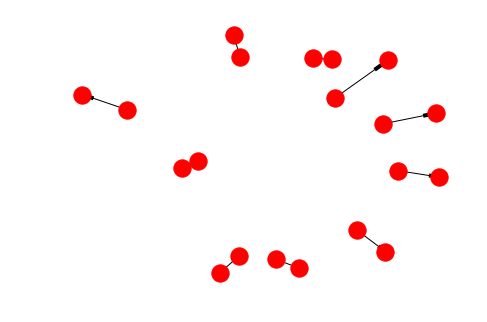

In [31]:
G = nx.DiGraph()
    
linked_nodes = [(features['From'][i],features['To'][i])for i in range(0,10)]
    
G.add_edges_from(linked_nodes)

nx.draw(G)
plt.show()

In [36]:
def common_neighbors(features, G):
    result = []
    for i in range(features.shape[0]):
        a = features['From'][i]
        b = features['To'][i]
#         a = features[0][0]
#         b = features[0][0]
        num_comm_neighbors = 0
        try:
            neighbors_one, neighbors_two = G.neighbors(a), G.neighbors(b)
            for neighbor in neighbors_one:
                if neighbor in neighbors_two:
                    num_comm_neighbors += 1
            result.append((a, b, num_comm_neighbors))
        except:
            pass
    return result

In [37]:
common_neighbors(features, create_graph(features))

[('9909133', '9811241', 0),
 ('9702110', '9410212', 0),
 ('9510041', '9210121', 0),
 ('9703036', '9611090', 0),
 ('9610162', '9609159', 0),
 ('9905085', '9803171', 0),
 ('9303003', '9202046', 0),
 ('9604189', '9601152', 0),
 ('9601175', '9507050', 0),
 ('9801084', '9705128', 0),
 ('9809104', '9601116', 0),
 ('9703138', '9603081', 0),
 ('9609181', '9604168', 0),
 ('9701137', '9606165', 0),
 ('9607051', '9401006', 0),
 ('9608169', '9409009', 0),
 ('9709113', '9608015', 0),
 ('9505073', '9207053', 0),
 ('9811217', '9802202', 0),
 ('9805083', '9510182', 0),
 ('9908147', '9808101', 0),
 ('9704118', '9208007', 0),
 ('9803189', '9602052', 0),
 ('9812028', '9609070', 0),
 ('9707014', '9610043', 0),
 ('9902184', '9801052', 0),
 ('9802168', '9709193', 0),
 ('9607210', '9505051', 0),
 ('9910090', '9902055', 0),
 ('9509147', '9509142', 0),
 ('9512026', '9304087', 0),
 ('9511230', '9511204', 0),
 ('9803117', '9612115', 0),
 ('9501042', '9310042', 0),
 ('9903214', '9203018', 0),
 ('9903029', '981216

In [38]:
graph = create_graph(features)

In [41]:
def CommonNeighbors(a, b, g):
    a_neighbors = set(graph.neighbors(a))
    b_neighbors = set(graph.neighbors(b))
    return len(a_neighbors.intersection(b_neighbors))

In [42]:
linked_nodes = [(features['From'][i],features['To'][i])for i in range(len(features))]
CommonNeighbors(features['From'],features['To'], graph)

TypeError: 'Series' objects are mutable, thus they cannot be hashed